In [2]:
library(ggplot2)
samp_data <-  data.frame(income=sample(loans_income, 1000),
                   type = 'data_dist')
samp_mean_05 <- data.frame(
    income = tapply(sample(loans_income, 1000*5),
                   rep(1:1000, rep(5,1000)),FUN=mean),
    type = 'mean_of_5')
samp_mean_20 <- data.frame(
    income = tapply(sample(loans_income, 1000*20),
                   rep(1:1000, rep(20, 1000)), FUN=mean),
    type = 'mean_of_20')
income <- rbind(samp_data, samp_mean_05, samp_mean_20)
income$type = factor(income$type,
                    levels=c('data_dist', 'mean_of_5', 'mean_of_20'),
                    lavels=c('Data', 'Mean of 5', 'Mean of 20'))
ggplot(income, aes(x=income)) +
    geom_histogram(bins=40) + 
   facet_grid(type ~ .)

ERROR: Error in sample(loans_income, 1000): 객체 'loans_income'를 찾을 수 없습니다


In [14]:
library(boot)
library(ggplot2)

PSDS_PATH <- file.path('~', 'statistics-for-data-scientists')

loans_income <- read.csv(file.path(PSDS_PATH, 'data', 'loans_income.csv'))[,1]
sp500_px <- read.csv(file.path(PSDS_PATH, 'data', 'sp500_px.csv'))

x <- seq(from=-3, to=3, length=300)
gauss <- dnorm(x)

png(filename=file.path(PSDS_PATH, 'figures', 'normal_density.png'),  width = 4, height=5, units='in', res=300)
par(mar=c(3, 3, 0, 0)+.1)
plot(x, gauss, type="l", col='blue', xlab='', ylab='', axes=FALSE)
polygon(x, gauss, col='blue')
dev.off()

png(filename=file.path(PSDS_PATH, 'figures', 'samp_hist.png'), width = 200, height = 250)
norm_samp <- rnorm(100)
par(mar=c(3, 3, 0, 0)+.1)
hist(norm_samp, axes=FALSE, col='red', main='')
dev.off()

## Code snippet 2.1
stat_fun <- function(x, idx) median(x[idx])
boot_obj <- boot(loans_income, R = 1000, statistic=stat_fun)


# take a simple random sample
samp_data <- data.frame(income=sample(loans_income, 1000), 
                        type='data_dist')
# take a sample of means of 5 values
samp_mean_05 <- data.frame(
  income = tapply(sample(loans_income, 1000*5), 
                  rep(1:1000, rep(5, 1000)), FUN=mean),
  type = 'mean_of_5')
# take a sample of means of 20 values
samp_mean_20 <- data.frame(
  income = tapply(sample(loans_income, 1000*20), 
                  rep(1:1000, rep(20, 1000)), FUN=mean),
  type = 'mean_of_20')
# bind the data.frames and convert type to a factor
income <- rbind(samp_data, samp_mean_05, samp_mean_20)
income$type = factor(income$type, 
                     levels=c('data_dist', 'mean_of_5', 'mean_of_20'),
                     labels=c('Data', 'Mean of 5', 'Mean of 20'))
# plot the histograms
ggplot(income, aes(x=income)) +
  geom_histogram(bins=40) +
  facet_grid(type ~ .)

Warning message in file(file, "rt"):
"파일 'C:\Users\715ac\Documents/R/data/loans_income.csv'를 여는데 실패했습니다: No such file or directory"

ERROR: Error in file(file, "rt"): 커넥션을 열 수 없습니다


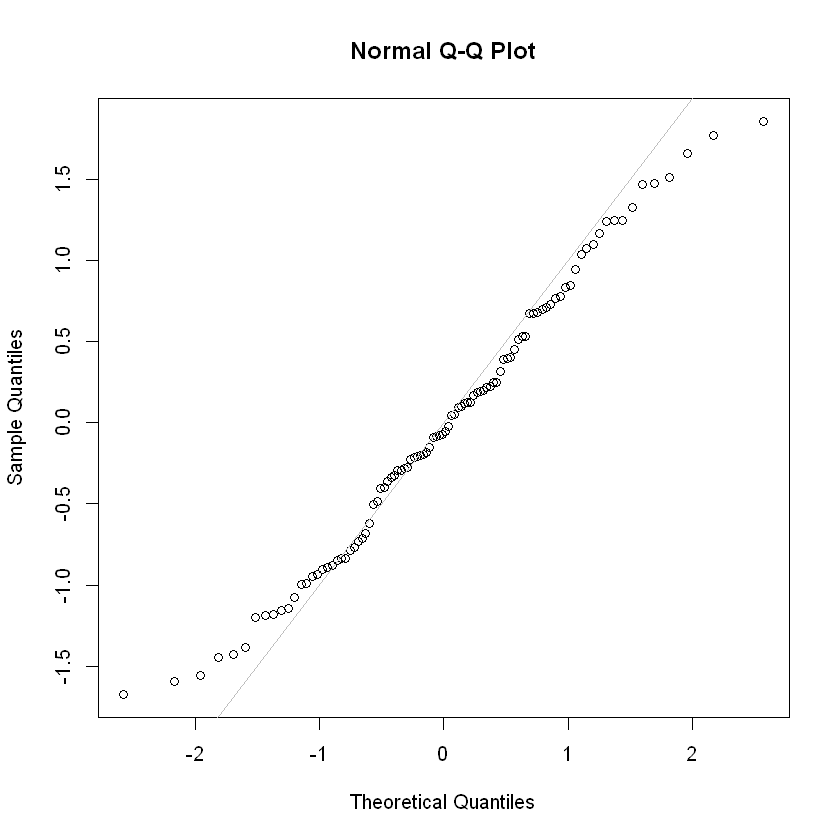

In [11]:
norm_samp <- rnorm(100) 
qqnorm(norm_samp) 
abline(a=0, b=1, col='grey')

In [17]:
nflx <- sp500_px[,'NFLX'] 
nflx <- diff(log(nflx[nflx>0])) 
qqnorm(nflx) 
abline(a=0, b=1, col='grey')

ERROR: Error in eval(expr, envir, enclos): 객체 'sp500_px'를 찾을 수 없습니다
